# Лабораторна робота 2.

## Створення штучно синтезованих наборів даних

**Лабораторна робота виконується індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Завдання 1: Синтезувати набір даних, який складається з двох лінійно роздільних множин, що можуть бути використані для навчання моделей класифікації.**


**Роз'яснення до завдання 1:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Обидва класи мають бути лінійно роздільні, тобто можна знайти таку пряму, яка розділяє дані двох класів без помилок.
   - Дані повинні бути рівномірно розподілені по всьому простору, але з певним відхиленням для забезпечення реалістичності.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів двох класів.
     - Додавання невеликого шуму до кожного класу для забезпечення варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Перевірка лінійної роздільності: Побудуйте графік з нанесеними точками і покажіть лінію, яка розділяє два класи.

5. **Додаткові умови:**
- Зробіть аналіз набору даних, побудувавши гістограми розподілу даних для кожного класу окремо.
- Опишіть підходи, які використовувалися для створення набору даних.

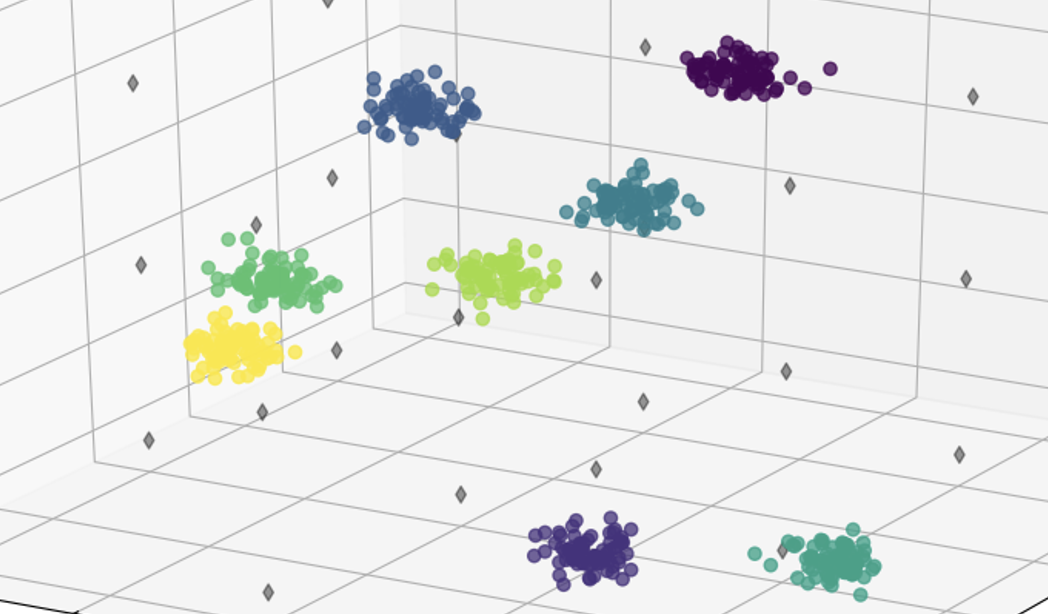

In [2]:
n_samples = 500

mean_class1 = [0, 0]
mean_class2 = [5, 5]
cov = [[1, 0], [0, 1]]

class1 = np.random.multivariate_normal(mean_class1, cov, n_samples)
class2 = np.random.multivariate_normal(mean_class2, cov, n_samples)

X = np.vstack((class1, class2))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

df = pd.DataFrame(X, columns=['x', 'y'])
df['class'] = y

df.to_csv('task1.csv', index=False)


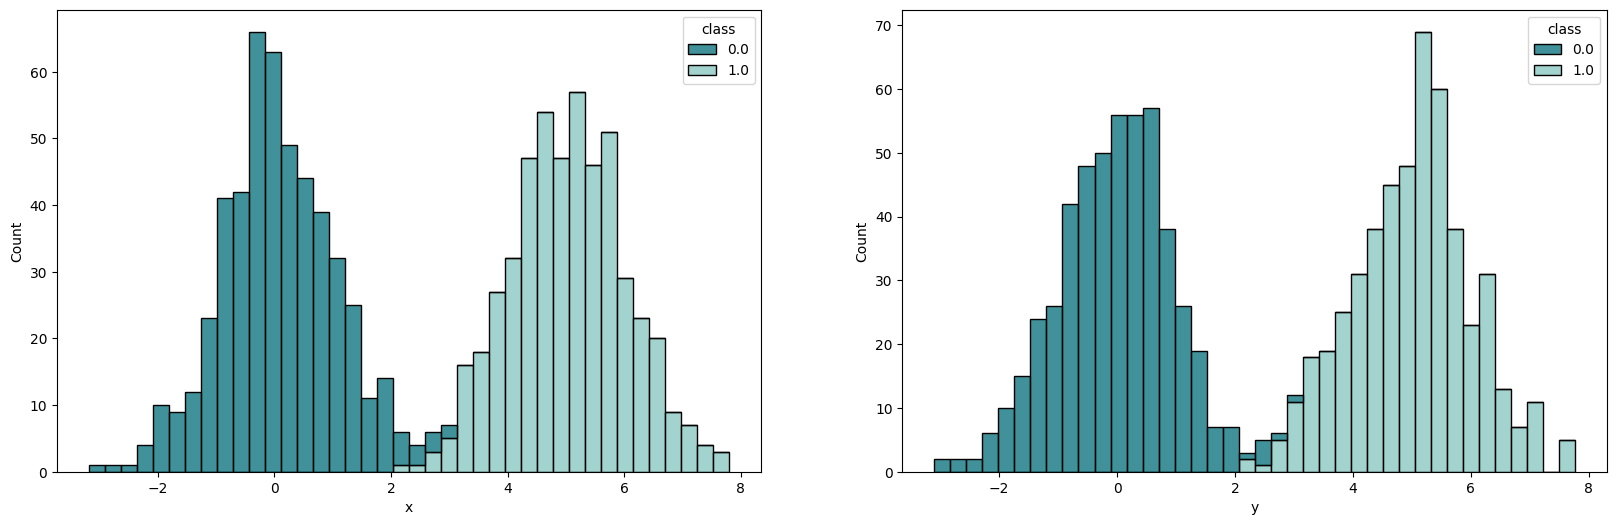

In [3]:
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=df, x="x", ax=ax1, hue="class", palette=["#006d77", "#83c5be"], bins=40, multiple="stack")

sns.histplot(data=df, x="y", ax=ax2, hue="class", palette=["#006d77", "#83c5be"], bins=40, multiple="stack")

plt.show()

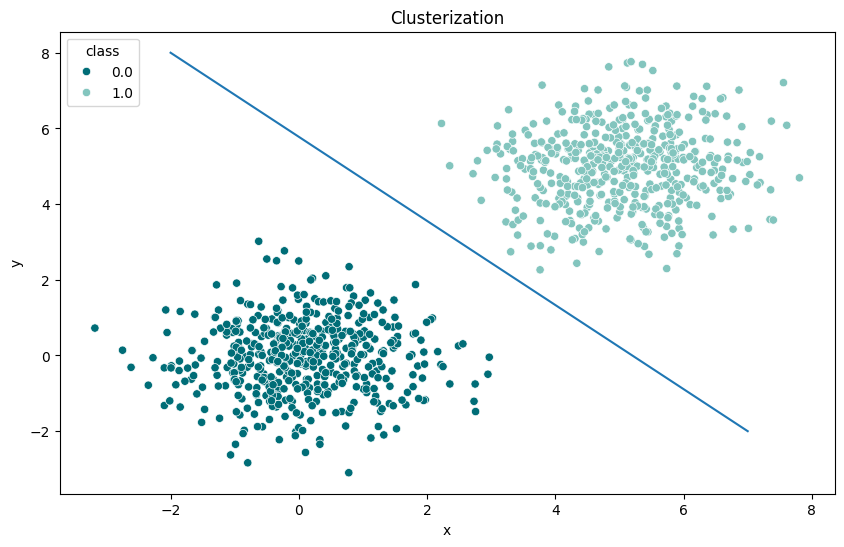

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(data=df, x="x", y="y", hue="class", palette=["#006d77", "#83c5be"], ax=ax)
plt.plot([-2, 7], [8, -2])
ax.set_title("Clusterization")

plt.show()

У цьому завданні я використала метод генерації даних на основі багатовимірного нормального розподілу. 

Функція np.random.multivariate_normal використовується для генерації випадкових точок з нормального розподілу для двох різних класів.

Цей підхід дозволяє створювати дані, де кожен клас має свій центр і розподіляється навколо нього.

Гістаграми наближені до нормального розподілу. На другому ж графіку чітко видно розподілення на два класи. 


**Завдання 2: Синтезувати набір даних, який складається з трьох множин (класів), що мають часткове перекриття, для використання в задачах класифікації та аналізу даних.**

**Роз'яснення до завдання 2:**

1. **Опис набору даних:**
   - Набір даних повинен містити три класифікаційні мітки (клас 1, клас 2, клас 3).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані мають утворювати три множини, кожна з яких розподілена навколо свого центру, але з перекриттям з іншими множинами.
   - Кожен клас повинен мати певну ступінь перекриття з іншими класами, що призводить до часткової змішуваності точок з різними мітками.
   - Можливі варіанти синтезу:
     - Використання нормального розподілу для генерації точок навколо центроїдів кожного класу.
     - Додавання більшого шуму або кореляції між точками для збільшення ступеня перекриття.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **300** для кожного класу (всього **900**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **900** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для всіх трьох класів, щоб візуалізувати перекриття множин.
   - Перевірте, чи дійсно дані утворюють перекриття між класами, показавши частку точок, які належать до зон перекриття.

5. **Додаткові умови:**
   - Побудуйте кореляційні графіки та гістограми розподілу для кожного класу.
   - Опишіть підходи, які використовувалися для створення набору даних, і обґрунтуйте вибір параметрів.

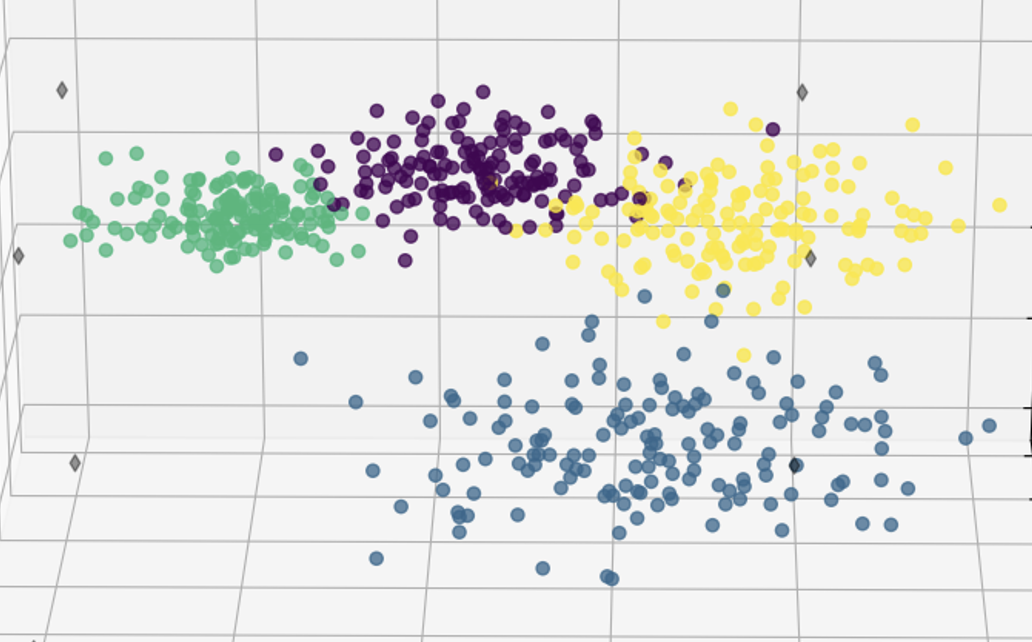

In [5]:
from sklearn.datasets import make_blobs

n_samples = 450

сenters = [ [-2,-2], [2,2], [-2,2] ]

X, y = make_blobs(n_samples=2*n_samples, centers=сenters, cluster_std=2.5, random_state=42)

df_2 = pd.DataFrame({'x': X[:, 0], 'y': X[:, 1], 'class': y})

df_2.to_csv('task2.csv', index=False)

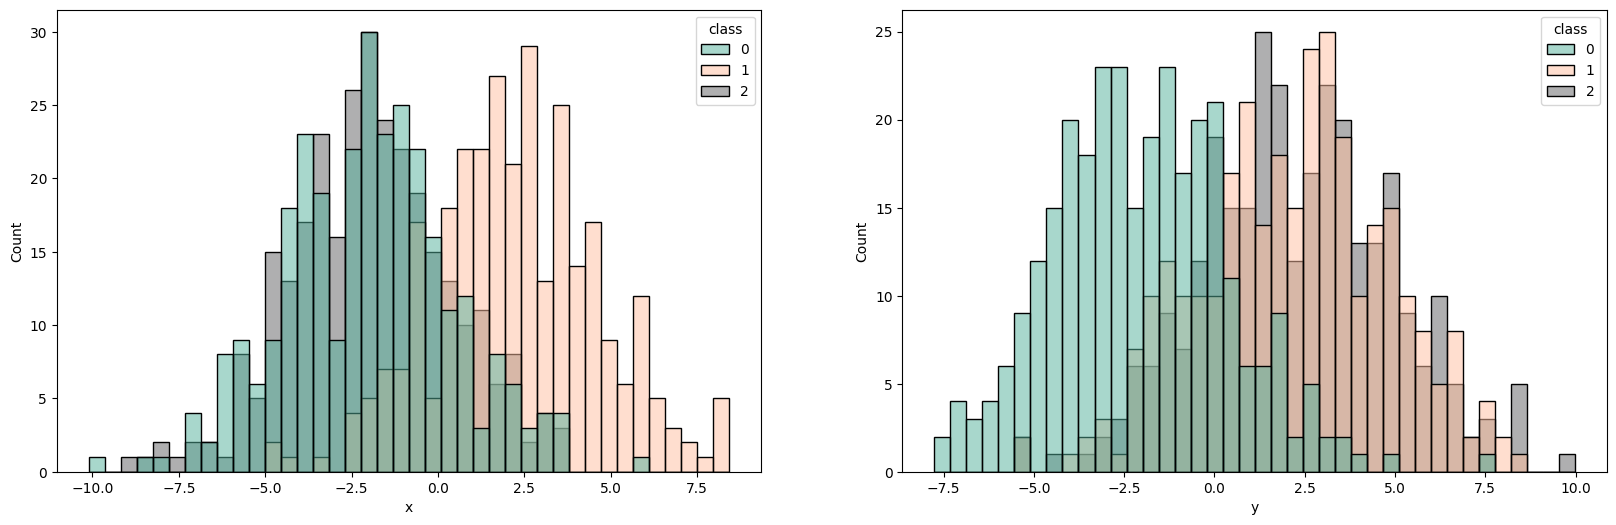

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

sns.histplot(data=df_2, x="x", ax=ax1, hue="class", palette=["#53B09B", "#FFBFA0", "#616163"], bins=40, multiple="layer")

sns.histplot(data=df_2, x="y", ax=ax2, hue="class", palette=["#53B09B", "#FFBFA0", "#616163"], bins=40, multiple="layer")

plt.show()

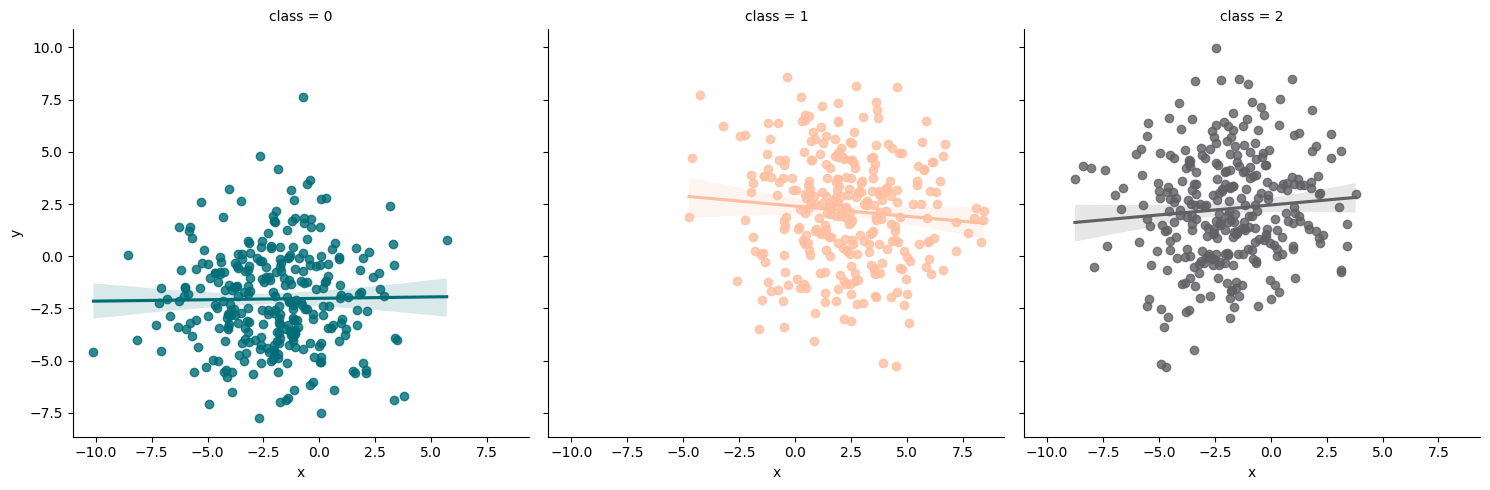

In [7]:
sns.lmplot(x="x", y="y", col="class", hue="class", data=df_2, col_wrap=3, height=5, palette=["#006d77", "#FFBFA0", "#616163"])
plt.show()

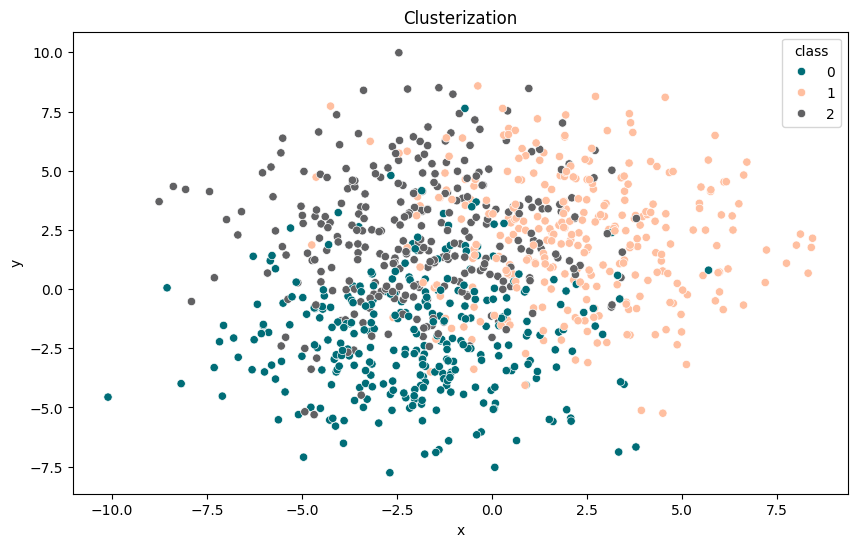

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

sns.scatterplot(data=df_2, x="x", y="y", hue="class", palette=["#006d77", "#FFBFA0", "#616163"], ax=ax)
ax.set_title("Clusterization")

plt.show()

 Гістограми розподілу тепер перекриваються, бо ми додали часткове накладання між множинами, і дані вже не лінійно роздільні.
 
 Класи знаходяться досить далеко один від одного. Тому ми додали noise (чим більше цей показник тим більше накладаються класи)

**Завдання 3: Синтезувати набір даних, який складається з двох множин у формі "тор в торі", де одна множина має форму внутрішнього тора, а інша — зовнішнього тора.**

**Роз'яснення до завдання 3:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві множини у формі тора: одна множина повинна бути розташована всередині іншої (тобто, "тор в торі").
   - Внутрішній тор (клас 1) повинен мати менший радіус і ширину, ніж зовнішній тор (клас 2).
   - Розподіл точок повинен бути рівномірним вздовж кожного тора з додаванням невеликого шуму для забезпечення варіативності.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y) $і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох класів, щоб візуалізувати форму "тор в торі".
   - Перевірте розподіл точок уздовж кожного тора, побудувавши радіальні гістограми для кожного класу.

5. **Додаткові умови:**
   - Побудуйте окремі графіки, які демонструють розподіл даних для кожного тора окремо.
   - Опишіть процес генерації даних та поясніть вибір параметрів для кожного тора.

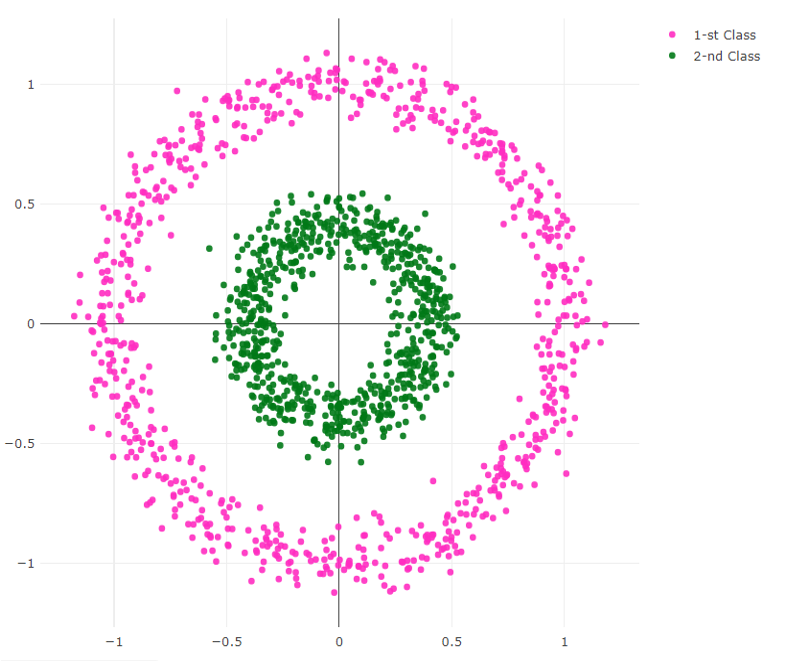

In [9]:
coden_samples = 500  
noise = 0.1   

inner_radius = 5
inner_width = 1
theta_inner = np.linspace(0, 2*np.pi, n_samples)
r_inner = inner_radius + inner_width * np.random.randn(n_samples)
x_inner = r_inner * np.cos(theta_inner)
y_inner = r_inner * np.sin(theta_inner)
class_inner = np.ones(n_samples)  

outer_radius = 12
outer_width = 1
theta_outer = np.linspace(0, 2*np.pi, n_samples)
r_outer = outer_radius + outer_width * np.random.randn(n_samples)
x_outer = r_outer * np.cos(theta_outer)
y_outer = r_outer * np.sin(theta_outer)
class_outer = np.full(n_samples, 2) 

x = np.concatenate([x_inner, x_outer])
y = np.concatenate([y_inner, y_outer])
classes = np.concatenate([class_inner, class_outer])

df_3 = pd.DataFrame({'x': x, 'y': y, 'class': classes})

df_3.to_csv('task3.csv', index=False)

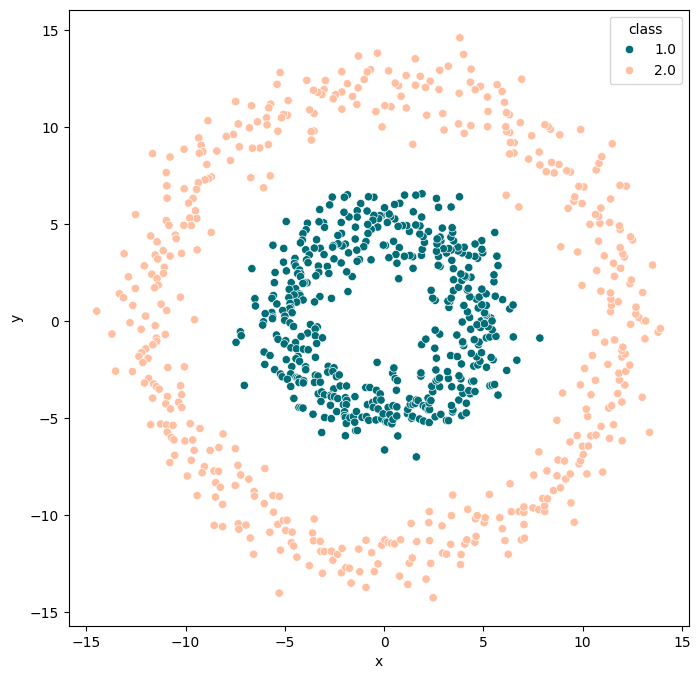

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

sns.scatterplot(data=df_3, x='x', y='y', hue="class", palette=["#006d77", "#FFBFA0"], ax=ax)
plt.show()

Тори було побудовано згідно формул. В даному випадку я ще додала шум, для більшої реалістичності. 

**Завдання 4: Синтезувати набір даних, який складається з двох множин, що утворюють подвійну спіраль, де одна спіраль огортає іншу.**

**Роз'яснення до завдання 4:**

1. **Опис набору даних:**
   - Набір даних повинен містити дві класифікаційні мітки (клас 1 і клас 2).
   - Кожен об'єкт набору даних повинен бути представленим у вигляді точки в двовимірному просторі $(x, y)$.

2. **Вимоги до генерації даних:**
   - Дані повинні утворювати дві спіралі, закручені одна в іншу, так щоб кожна спіраль відповідала одному з класів.
   - Спіралі повинні мати протилежні напрямки закручування (одна за годинниковою стрілкою, інша — проти).
   - Кожна спіраль повинна бути рівномірно заповнена точками з невеликим додаванням шуму для варіативності даних.

3. **Параметри набору даних:**
   - Кількість точок (об'єктів) у наборі даних: **500** для кожного класу (всього **1000**).
   - Формат вихідних даних: CSV-файл, де кожен рядок містить значення координат $(x, y)$ і відповідну мітку класу.

4. **Очікуваний результат:**
   - CSV-файл, який містить **1000** рядків з трьома колонками: $x$, $y$, $class$.
   - Побудуйте графік з нанесеними точками для обох спіралей, щоб візуалізувати структуру "спіраль у спіралі".
   - Проаналізуйте відмінності у розподілі точок для обох класів та оцініть складність їх розділення.

5. **Додаткові умови:**
   - Створіть окремі графіки, що показують як закручується кожна спіраль.
   - Опишіть процес генерації даних, включаючи параметри, що використовувалися для визначення форми спіралей.

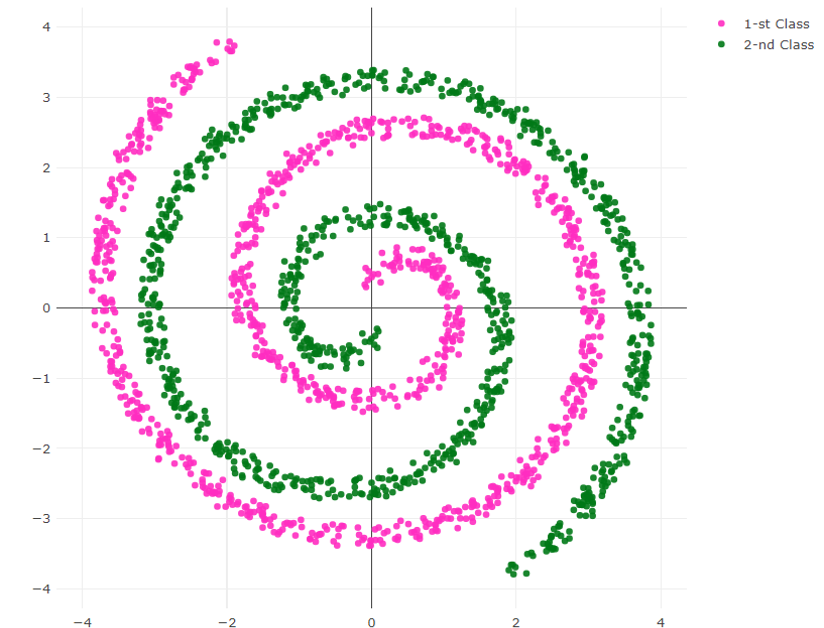

In [11]:
samples = 500
noise = 0.2
turns = 3

theta_1 = np.random.uniform(0, turns * 2 * np.pi, samples)
x_1 = (theta_1 * np.cos(theta_1)) + np.random.normal(0, noise, samples)
y_1 = (theta_1 * np.sin(theta_1)) + np.random.normal(0, noise, samples)
class1 = np.zeros(samples).astype('int64')

theta_2 = np.random.uniform(0, turns * 2 * np.pi, samples)
x_2 = (-theta_2 * np.cos(theta_2)) + np.random.normal(0, noise, samples)
y_2 = (-theta_2 * np.sin(theta_2)) + np.random.normal(0, noise, samples)
class2 = np.ones(samples).astype('int64')

df_class1 = pd.DataFrame({"x": x_1, "y": y_1, "class": class1}) 
df_class2 = pd.DataFrame({"x": x_2, "y": y_2, "class": class2}) 


df_4 = pd.concat([df_class1, df_class2])

df_4.to_csv("task4.csv", index=False)


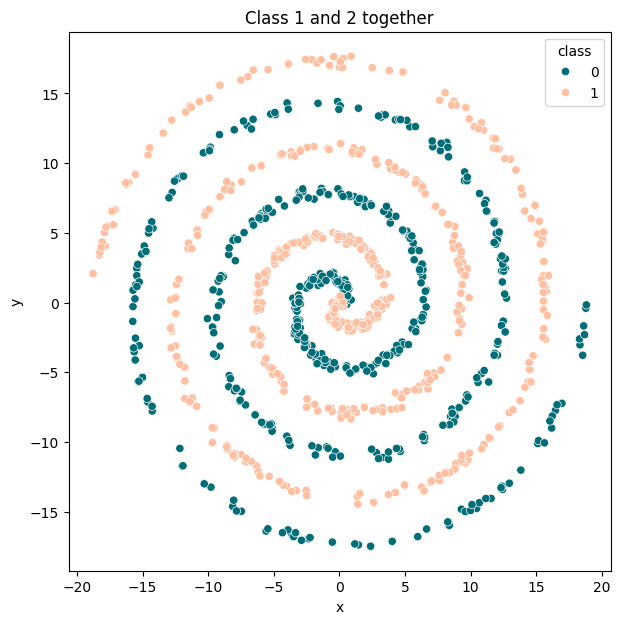

In [12]:
fig, ax = plt.subplots(figsize=(7, 7)) 

sns.scatterplot(data=df_4, x='x', y='y', hue="class", palette=["#006d77", "#FFBFA0"], ax=ax)
ax.set_title("Class 1 and 2 together")

plt.show()

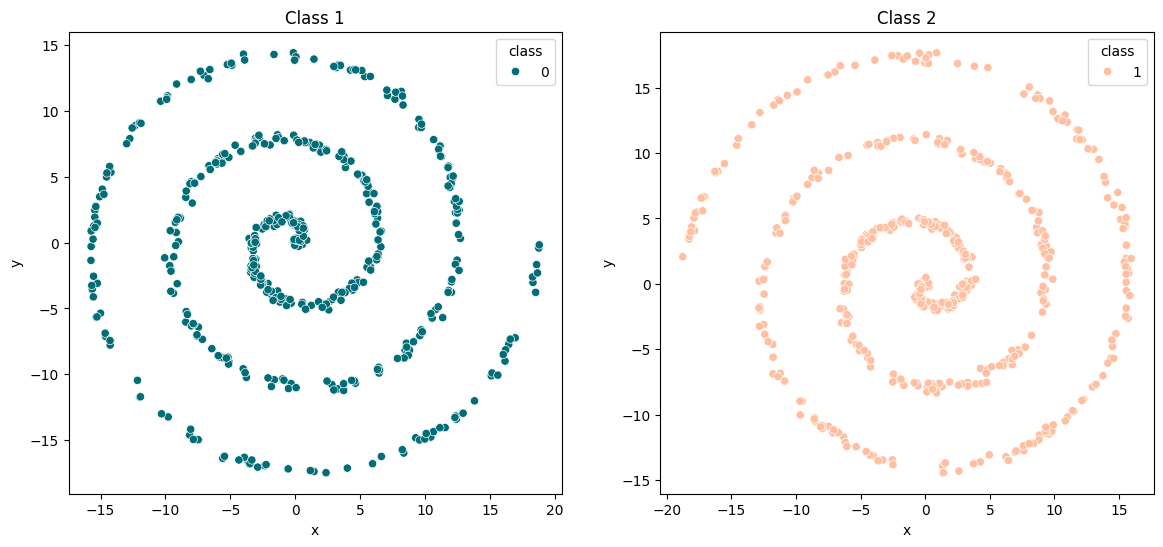

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_class1, x='x', y='y', hue="class", palette=["#006d77"], ax=ax1)
ax1.set_title("Class 1")

sns.scatterplot(data=df_class2, x='x', y='y', hue="class", palette=["#FFBFA0"], ax=ax2)
ax2.set_title("Class 2")

plt.show()

Одну спіраль генеруємо так щоб вона закручувалася в одному напрямку, інша в протилежному (за годинниковою стрілкою і проти). / за допомогою рівняння спіралі

turns - відповідає за те, скільки спіраль буде мати обертів

Також було додано шум та samples.

**Завдання 5: Синтезувати кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами, дослідити вплив параметрів на динаміку системи та візуалізувати результати.**


### 5.1: Теоретичне підґрунтя

**Опис системи Лоренца:**
Система Лоренца — це набір трьох нелінійних диференціальних рівнянь, що описують динаміку тривимірної системи з хаотичною поведінкою. Вона визначається такими рівняннями:

$$
\frac{dx}{dt} = \sigma (y - x)
$$

$$
\frac{dy}{dt} = x (\rho - z) - y
$$

$$
\frac{dz}{dt} = xy - \beta z
$$

Де:
- $(x, y, z)$ — змінні стану системи.
- $\sigma$ — параметр, що відповідає за швидкість зміни (часто називають "параметр Прандтля").
- $\rho$ — параметр, що відповідає за різницю температур у системі (відповідає за інтенсивність конвекції).
- $\beta$  — параметр, що відповідає за співвідношення розмірів.

**Роз'яснення до завдання:**
- Згенерувати дані для системи Лоренца за допомогою різних значень параметрів $\sigma$, $\rho$ та $\beta$.
- Проаналізувати вплив зміни параметрів на траєкторії системи.
- Візуалізувати результати в тривимірному просторі для кожного набору даних.

### 5.2: Генерація та візуалізація набору даних

**Що треба зробити:**

1. **Генерація даних:**
   - Вибрати декілька різних комбінацій параметрів $\sigma$, $\rho$ та $\beta$.
   - Використовуючи числовий метод (наприклад, метод Рунге-Кутти 4-го порядку), згенерувати траєкторії системи Лоренца для кожного набору параметрів.

2. **Візуалізація:**
   - Для кожного набору параметрів побудувати тривимірні графіки траєкторій.
   - Відобразити траєкторії в просторі $(x, y, z)$.

3. **Аналіз:**
   - Порівняти результати для різних наборів параметрів.
   - Описати, як зміна кожного з параметрів впливає на поведінку системи (наприклад, перехід від стабільного до хаотичного режиму).

**Очікуваний результат:**
- Кілька наборів даних, що описують траєкторії системи Лоренца з різними параметрами (мінімум 3).
- Візуалізації цих траєкторій у тривимірному просторі.
- Аналіз і опис впливу параметрів на динаміку системи.

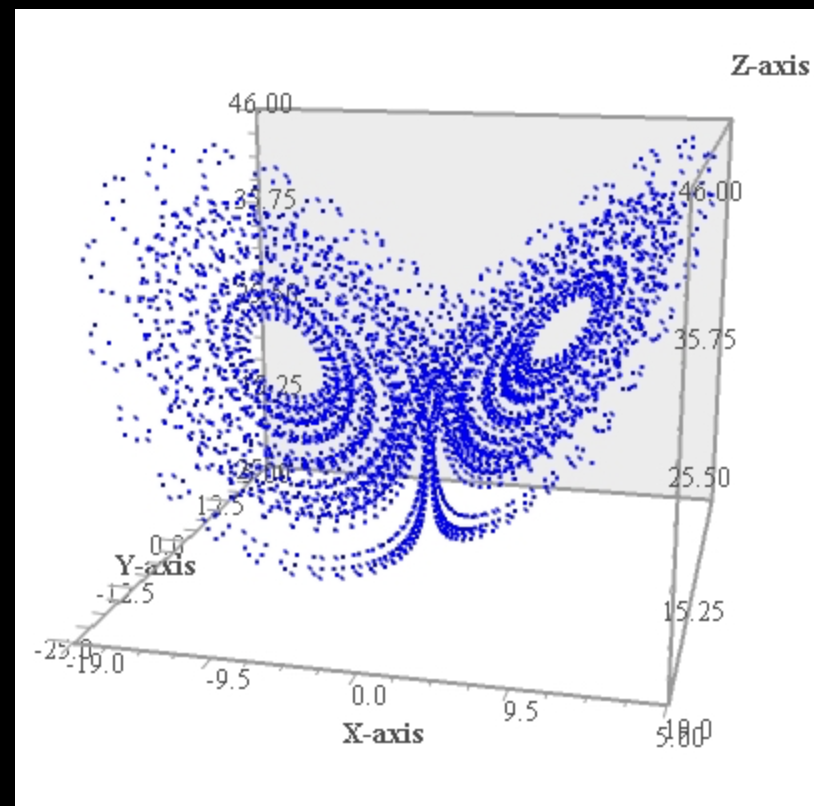

In [14]:
def lorenz(state, sigma, rho, beta):
    x, y, z = state
    dx = sigma * (y - x)
    dy = x * (rho - z) - y
    dz = x * y - beta * z
    return np.array([dx, dy, dz])

In [15]:
def runge_kutta_4(lorenz_func, y0, t, sigma, rho, beta):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(1, n):
        yi = y[i-1]
        k1 = h * lorenz_func(yi, sigma, rho, beta)
        k2 = h * lorenz_func(yi + 0.5 * k1, sigma, rho, beta)
        k3 = h * lorenz_func(yi + 0.5 * k2, sigma, rho, beta)
        k4 = h * lorenz_func(yi + k3, sigma, rho, beta)
        y[i] = yi + (k1 + 2*k2 + 2*k3 + k4) / 6
    return y

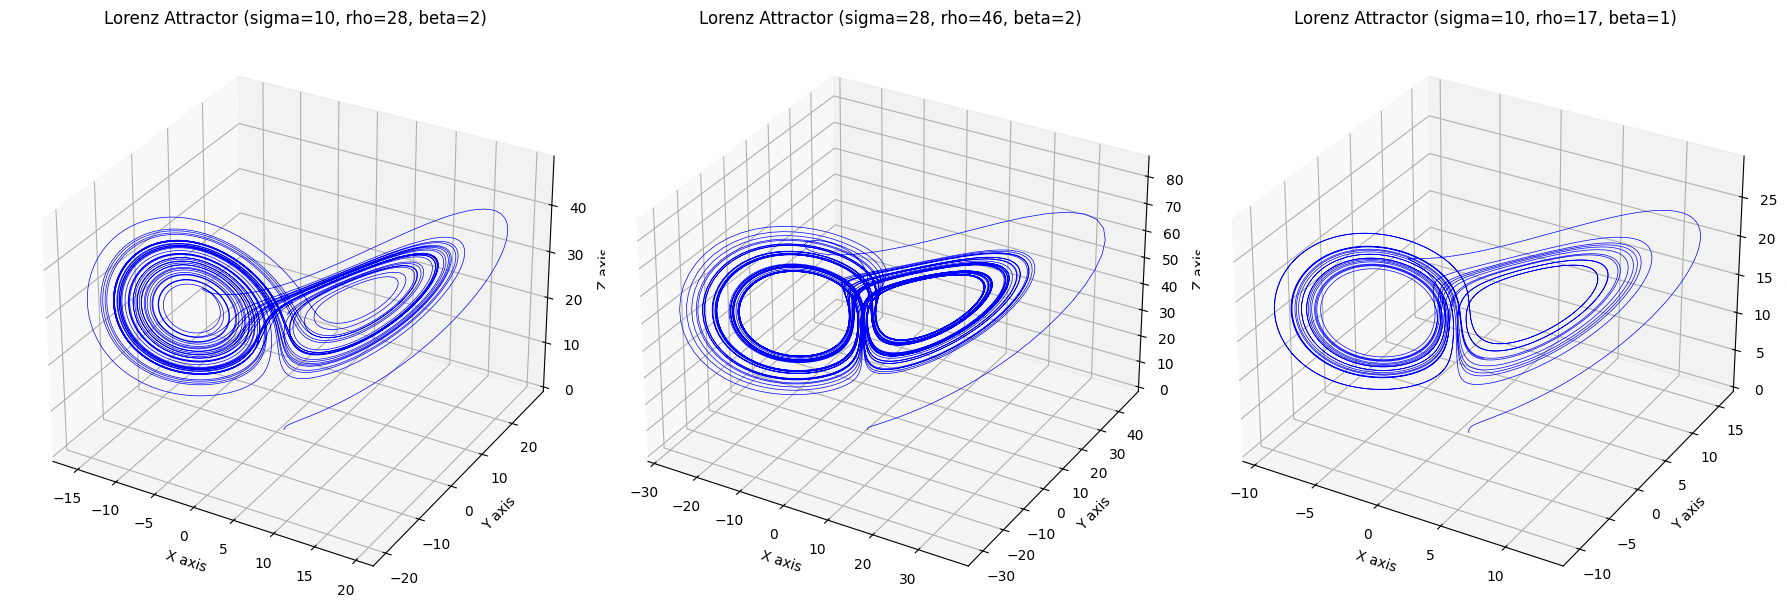

In [16]:
from mpl_toolkits.mplot3d import Axes3D

def generate_lorenz_data(sigma, rho, beta):
    y0 = np.array([1, 0, 0]) 
    t = np.linspace(0, 50, 10000)
    data = runge_kutta_4(lorenz, y0, t, sigma, rho, beta)
    return pd.DataFrame(data, columns=['x', 'y', 'z'])

def plot_lorenz_3d(sigma, rho, beta, ax):
    df = generate_lorenz_data(sigma, rho, beta)
    
    ax.plot(df['x'], df['y'], df['z'], lw=0.5, color='b')

    ax.set_title(f"Lorenz Attractor (sigma={sigma}, rho={rho}, beta={beta})")
    ax.set_xlabel("X axis")
    ax.set_ylabel("Y axis")
    ax.set_zlabel("Z axis")

sigma_values = [10, 28, 10]
rho_values = [28, 46, 17]
beta_values = [2, 2, 1]

fig = plt.figure(figsize=(18, 6))

for i in range(3):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    plot_lorenz_3d(sigma_values[i], rho_values[i], beta_values[i], ax)

plt.tight_layout()
plt.show()

У цьому завданні було використано метод Рунге.

1. Сігма впливає на швидкість зміни координати x.  
2. Ро регулює силу потоків.  
3. Бета визначає пропорції розмірів у системі.